In [1]:
using Plots
using Interact
using Distributions
using RandomMatrices

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2753031193288441153\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5613563496415469509\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2753031193288441153\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
function tw_pdf(xs, step)
    c = cdf(TracyWidom, vcat(vcat(xs[1]-step,xs),xs[end]+step))
    d = (diff(c)[1:end-1]+diff(c)[2:end]) / (2*step)
    return d
end

step = 0.1
min_, max_ = -6, 6
xs = min_:step:max_
TW_pdf = tw_pdf(xs, step);

In [3]:
function m_G(wait)
    N = size(wait)[1]
    memg = zeros(N, N) .- 1
    memg[1, 1] = 0
    function tmp_G(i, j, wait)
        if(memg[i, j] == -1)
            if(i==1)
                res1 = tmp_G(i, j-1, wait)
                memg[i, j-1] = res1
                res = res1 + wait[i, j] #+1
            elseif(j==1)
                res1 = tmp_G(i-1, j, wait)
                memg[i-1, j] = res1
                res = res1 + wait[i, j] #+1
            else
                res1 = tmp_G(i, j-1, wait)
                res2 = tmp_G(i-1, j, wait)
                memg[i, j-1] = res1
                memg[i-1, j] = res2
                res = max(res1, res2) + wait[i, j] #+1
            end
            memg[i, j] = res
        end
        return memg[i, j]
    end
    tmp_G(N, N, wait)
    return memg
end

m_G (generic function with 1 method)

In [4]:
function get_grid(law, N)
    w = rand(law, N, N)
    grid = m_G(w)
    return grid
end

get_grid (generic function with 1 method)

In [5]:
function renorm_params(law)
    r = 1
    if typeof(law) == Geometric{Float64}
        q = 1-params(law)[1]
        γ = (q*(1+r) + 2*√(q*r)) / (1-q)
        σ = (1/(1-q)) * (q/r)^(1/6) * (√q + √r)^(2/3) * (1 + √(q*r))^(2/3)
    elseif typeof(law) == Exponential{Float64}
        λ = 1/params(law)[1]
        γ = (1+√r)^2 / λ
        σ = r^(-1/6) * (1+r)^(4/3) / λ
    end
    return γ, σ
end

renorm_params (generic function with 1 method)

In [6]:
function plot_lln(max_N, law_name, q, λ)
    if(law_name == "Geometric")
        law = Geometric(q)
    else
        law = Exponential(λ)
    end
    γ, σ = renorm_params(law)
    grid = get_grid(law, max_N)
    diag = [grid[i,i] / i for i in 1:max_N]
    plot(1:max_N, diag, lw = 3, color = "red", legend=:bottomleft, xlabel = "N", label = "empirical T(N,N)")
    hline!([γ], lw = 3, color = "black", label = "theoretical limit")
end

plot_lln (generic function with 1 method)

In [7]:
function plot_clt(nb_samples, N, law_name, q, λ, TW_pdf, d)
    if(law_name == "Geometric")
        res = d[law_name][q][N][1:nb_samples]
        γ, σ = renorm_params(Geometric(q))
    else
        res = d[law_name][λ][N][1:nb_samples]
        γ, σ = renorm_params(Exponential(λ))
    end
    norm_res = (res .- γ*N) ./ (σ * N^(1/3))
    histogram(norm_res, normalize=true, bins=-5:0.2:2.5, label = "Empirical distribution")
    plot!(xs, TW_pdf, lw = 3, color = "red", label = "Tracy-Widom PDF")
end

plot_clt (generic function with 1 method)

### LLN

__The convergence happens from below ($\mathbb{E}[TW] \sim -2$).__

In [11]:
@manipulate for max_N = 100:50:1000, law_name = ["Geometric", "Exponential"], q = 0.05:0.05:0.95, λ = 1:1:10
    plot_lln(max_N, law_name, q, λ)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["max_N"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 19,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\matte\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\matte\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\matte\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\matte\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\matte\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000fed05d0, Task (runnable) @0x000000000fed05d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"150\",\"200\",\"250\",\"300\",\"350\",\"400\",\"450\",\"500\",\"550\",\"600\",\"650\",\"700\",\"750\",\"800\",\"850\",\"900\",\"950\",\"1000\"],\"changes\":WebIO.getval({\"name

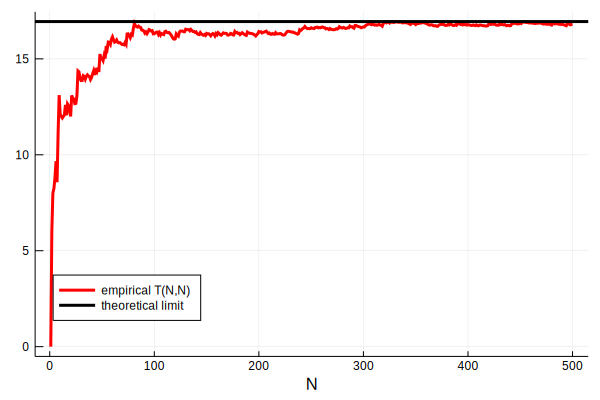

In [10]:
max_N = 500
law = "Geometric"
q = 0.2
λ = 1
plot_lln(max_N, law, q, λ)

### CLT

In [20]:
RANGE_N = 10:10:100
max_N = maximum(RANGE_N)
RANGE_q = 0.1*(1:9)
RANGE_λ = 1:10
NB_SAMPLES = 5000

d = Dict(vcat(("Geometric",Dict([(q, Dict([(N, Float64[]) for N in RANGE_N])) for q in RANGE_q])), ("Exponential",Dict([(λ, Dict([(N, Float64[]) for N in RANGE_N])) for λ in RANGE_λ]))))

for q in RANGE_q
    println("Geometric, ", q)
    law = Geometric(q)
    res = Float64[]
    for i in 1:NB_SAMPLES
        if(i%1000==0)
            println(i)
        end
        grid = get_grid(law, max_N)
        for N in RANGE_N
            append!(d["Geometric"][q][N], grid[N, N])
        end
    end
end

for λ in RANGE_λ
    println("Exponential, ", λ)
    law = Exponential(λ)
    res = Float64[]
    for i in 1:NB_SAMPLES
        if(i%1000==0)
            println(i)
        end
        grid = get_grid(law, max_N)
        for N in RANGE_N
            append!(d["Exponential"][λ][N], grid[N, N])
        end
    end
end

Geometric, 0.1
1000
2000
3000
4000
5000
Geometric, 0.2
1000
2000
3000
4000
5000
Geometric, 0.3
1000
2000
3000
4000
5000
Geometric, 0.4
1000
2000
3000
4000
5000
Geometric, 0.5
1000
2000
3000
4000
5000
Geometric, 0.6
1000
2000
3000
4000
5000
Geometric, 0.7
1000
2000
3000
4000
5000
Geometric, 0.8
1000
2000
3000
4000
5000
Geometric, 0.9
1000
2000
3000
4000
5000
Exponential, 1
Exponential, 2
Exponential, 3
Exponential, 4
Exponential, 5
Exponential, 6
Exponential, 7
Exponential, 8
Exponential, 9
Exponential, 10


In [22]:
@manipulate for nb_samples = 100:100:NB_SAMPLES, N = RANGE_N, law_name = ["Geometric", "Exponential"], q = RANGE_q, λ = RANGE_λ
    plot_clt(nb_samples, N, law_name, q, λ, TW_pdf, d)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nb_samples"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\matte\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\matte\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\matte\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\matte\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\matte\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000138ed430, Task (runnable) @0x00000000138ed430), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\

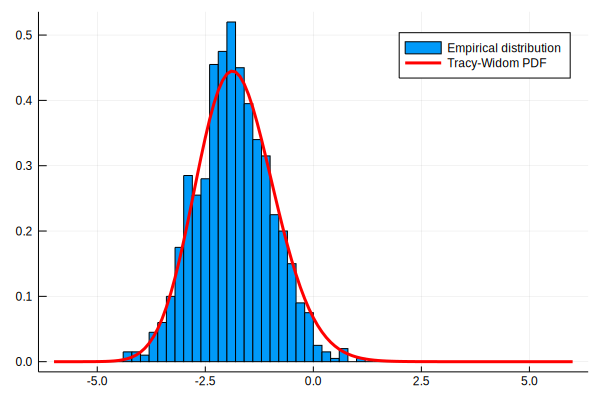

In [40]:
nb_samples = 1000
N = 100
law = "Exponential"
q = 0.2
λ = 9
plot_clt(nb_samples, N, law, q, λ, TW_pdf, d)